# Use deep learning for image classification

<div style="text-align:center" markdown="1">
![Image of Image to Digit](https://www.wolfram.com/mathematica/new-in-10/enhanced-image-processing/HTMLImages.en/handwritten-digits-classification/smallthumb_10.gif)
Mapping images of numbers to numbers
</div>

<a id="load_libraries"></a>
## Load libraries

If you haven't already installed it, run the following cell to install the `nolearn` deep learning Python library in your notebook environment. Then, import the the libraries that you will be using for this notebook.

In [1]:
!pip install --user nolearn

    100% |████████████████████████████████| 327kB 3.0MB/s 
    100% |████████████████████████████████| 174kB 5.2MB/s 
    100% |████████████████████████████████| 133kB 6.0MB/s 
    100% |████████████████████████████████| 2.9MB 422kB/s 
  Running setup.py install for gnumpy ... - done
  Running setup.py install for gdbn ... - done
  Running setup.py install for Lasagne ... - \ | done
  Running setup.py install for Theano ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / done
  Running setup.py install for nolearn ... - done


In [2]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report
from sklearn import datasets
from nolearn.dbn import DBN
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

gnumpy: failed to import cudamat. Using npmat instead. No GPU will be used.


<a id="access_data"></a>
## Access data

MNIST is a database of handwritten numbers. Because it uses real-world data, it is an ideal database for training neural networks and machine learning tools that use pattern recognition.

Run the following cell to get the MNIST data set of images of handwritten numbers:

In [3]:
mnist = datasets.fetch_mldata("MNIST Original")

Then split the images into training and testing data sets:

In [4]:
trX, teX, trY, teY = train_test_split(mnist.data / 255.0, mnist.target.astype("int0"), test_size = 0.33)
print "Number of images for training:", trX.shape[0]
print "Number of images used for testing:", trY.shape[0]
pix = int(np.sqrt(teX.shape[1]))
print "Each image is:", pix, "by", pix, "pixels"

Number of images for training: 46900
Number of images used for testing: 46900
Each image is: 28 by 28 pixels


<a id="train_model"></a>
## Train the pattern recognition model

This notebook shows you how to train a pattern recognition model for handwritten numbers by using the Deep Belief Network (DBN) solver.
The DBN solver is trained on approximately 47,000 images each with 784 pixels (28 by 28 before vectorizing) and uses 300 hidden units to support more efficient learning rates. The ten output units correspond to each of the single digit numbers (0 - 9). The results of the learning algorithms have an accuracy of 98 percent.

Run the following cell to train the DBN on handwritten digits. For details on the parameters used in the function, see  http://www.pyimagesearch.com/2014/09/22/getting-started-deep-learning-python/.


In [5]:
dbn = DBN(
    [trX.shape[1], 300, 10], 
    learn_rates = 0.3,
    learn_rate_decays = 0.9,
    epochs = 10, 
    verbose = 1) # set verbose to 0 for not printing output
dbn.fit(trX, trY)

[DBN] fitting X.shape=(46900, 784)
[DBN] layers [784, 300, 10]
[DBN] Fine-tune...


100%


Epoch 1:
  loss 0.282538888121
  err  0.0825648907104
  (0:00:07)


100%


Epoch 2:
  loss 0.178972389321
  err  0.0505464480874
  (0:00:08)


100%


Epoch 3:
  loss 0.126420147029
  err  0.0358179644809
  (0:00:08)


100%


Epoch 4:
  loss 0.0940116282573
  err  0.0274291325137
  (0:00:08)


100%


Epoch 5:
  loss 0.0721725129353
  err  0.022050034153
  (0:00:07)


100%


Epoch 6:
  loss 0.0581243720338
  err  0.018143784153
  (0:00:08)


100%


Epoch 7:
  loss 0.0422076487072
  err  0.013106215847
  (0:00:07)


100%


Epoch 8:
  loss 0.0328717291947
  err  0.0103526297814
  (0:00:07)


100%


Epoch 9:
  loss 0.0282093829002
  err  0.00866632513661
  (0:00:07)


100%


Epoch 10:
  loss 0.0187338593177
  err  0.00508025956284
  (0:00:07)


Then evaluate the the quality of the predictions for each digit:

In [6]:
preds = dbn.predict(teX)
print classification_report(teY, preds)

             precision    recall  f1-score   support

          0       0.98      0.99      0.98      2259
          1       0.99      0.99      0.99      2599
          2       0.98      0.97      0.97      2282
          3       0.98      0.97      0.97      2350
          4       0.98      0.98      0.98      2223
          5       0.97      0.98      0.97      2056
          6       0.98      0.98      0.98      2330
          7       0.98      0.98      0.98      2430
          8       0.97      0.97      0.97      2294
          9       0.98      0.96      0.97      2277

avg / total       0.98      0.98      0.98     23100



Define a function that randomly selects a few of the test images and their predictions:

Actual digit is 1 predicted 1


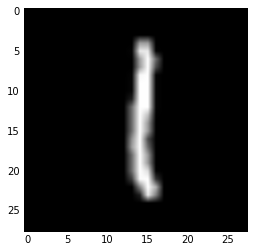

In [7]:
def randIm():
    i = np.random.choice(np.arange(0, len(teY)), size = (1,))
    pred = dbn.predict(np.atleast_2d(teX[i]))
    image = (teX[i] * 255).reshape((28, 28)).astype("uint8")
    # show the prediction
    print "Actual digit is", teY[i][0], "predicted", pred[0]
    imgplot = plt.imshow(image)
    imgplot.set_cmap('gray')   

randIm() 

Run this function several times to see randomly picked examples from the test data set:

Actual digit is 2 predicted 2


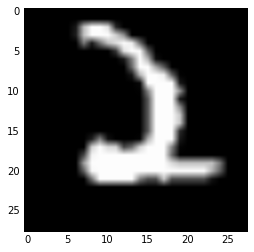

In [8]:
randIm()

Actual digit is 5 predicted 5


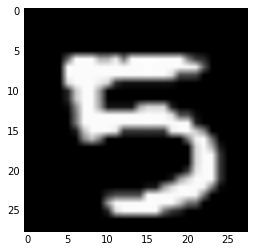

In [11]:
randIm()

<a id="summary"></a>
## Summary

In this Python notebook, you learned how to access the MNIST database that contains sample handwritten numbers. You learned to train the DBN solver to recognize handwritten single digit numbers and evaluate the predicted numeric output.

## Authors

**Jorge Castañón** is a data scientist at IBM Analytics, specializing in machine learning and text analytics using Apache Spark and Hadoop.

Some of the code used in this notebook was contributed by **Adrian Rosebrook**, entrepreneur and Chief PyImageSearcher at www.pyimagesearch.com. 